In [29]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [50]:
# kp and des methods

sift = cv2.xfeatures2d.SIFT_create()
def siftKpAndDes(frame):
    return sift.detectAndCompute(frame,None)

surf = cv2.xfeatures2d.SURF_create()
def surfKpAndDes(frame):
    return surf.detectAndCompute(frame,None)

star = cv2.xfeatures2d.StarDetector_create()
def fastKp(frame):
    return star.detect(frame,None)

brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
def briefDes(frame, kps):
    return brief.compute(frame, kps)

orb = cv2.ORB_create()
def orbKpAndDes(frame):
    return orb.detectAndCompute(frame,None)

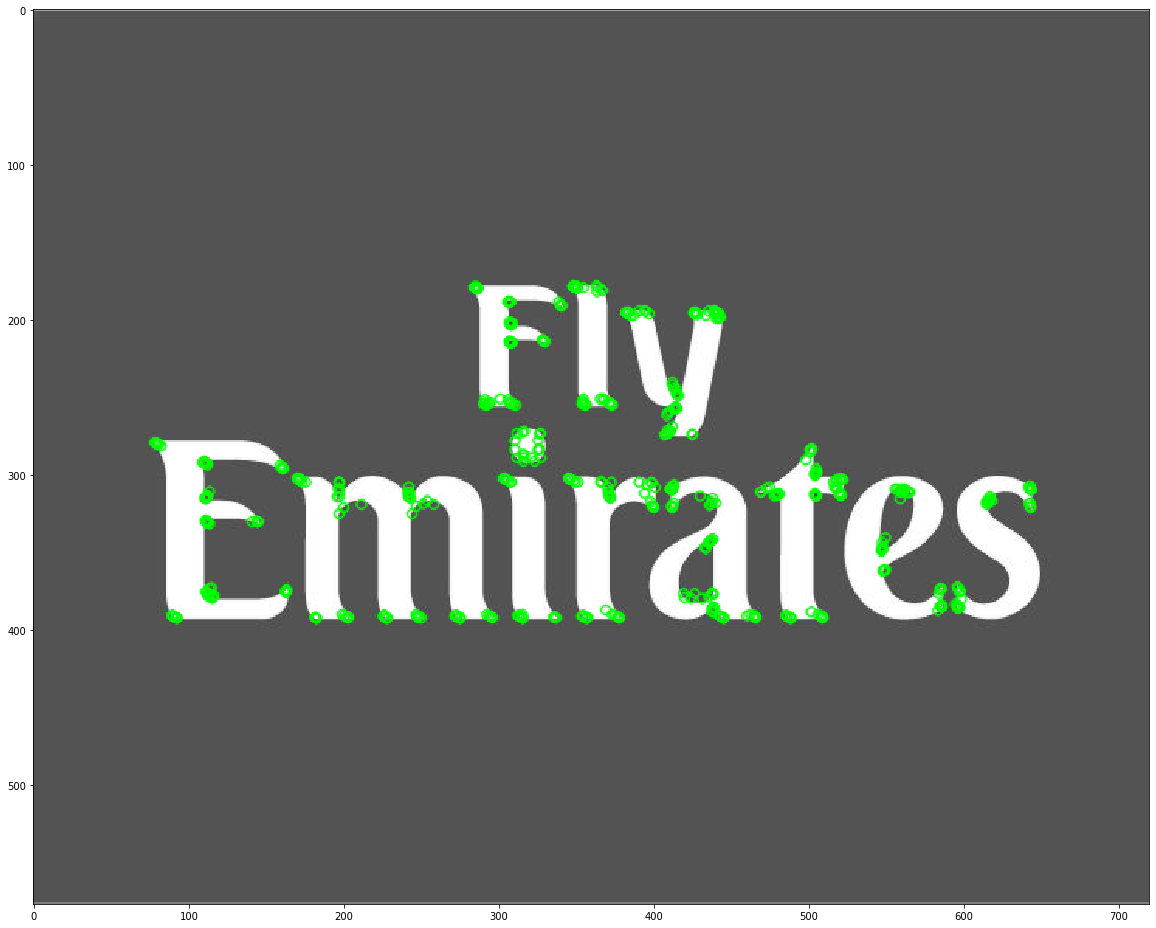

(<matplotlib.image.AxesImage at 0x11f479b50>, None)

In [54]:
# preprocess kp/des for query image(s)

img1 = cv2.imread('logos/emirates.jpg',0)          # queryImage
# find the keypoints and descriptors with SIFT
kp1, des1 = orbKpAndDes(img1)

img1kps = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
plt.figure(figsize=(20,20))
plt.imshow(img1kps), plt.show()

In [55]:
FRAME_INTERVAL = 1
FLANN_INDEX_KDTREE = 1
FLANN_INDEX_LSH = 6
FLANN_KDTREES = 5
SEARCH_CHECKS = 50
MIN_MATCH_COUNT = 10
LOWE_RATIO = 0.7 #lowered from 0.7 to derease sensitivity

#index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = FLANN_KDTREES)
# CHOOSE ^ for SIFT/SURF, or v for ORB
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2


search_params = dict(checks = SEARCH_CHECKS)
flann = cv2.FlannBasedMatcher(index_params, search_params)

cap = cv2.VideoCapture('videos/15brazil-5min.mp4')

while(True):
    for i in range(FRAME_INTERVAL):
        #skip i number of frames
        cap.grab()
        
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # find the keypoints and descriptors with SIFT
    kp2, des2 = orbKpAndDes(gray)
    
    # show only target image kps
#     img3 = cv2.drawKeypoints(gray, kp2, None, color=(0,255,0), flags=0)
#     cv2.imshow('frame',img3)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
#     continue
    
    matches = flann.knnMatch(des1,des2,k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for pair in matches:
        try:
            m,n = pair
            if m.distance < LOWE_RATIO*n.distance:
                good.append(m)
        except ValueError:
            print('Missing Match pair!')
            pass
            
    if len(good)>MIN_MATCH_COUNT:
        print(len(good))
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

        if M is None:
            # if homography matrix is empty
            print("Empty homography matrix")
        else:
#             print(M)
            matchesMask = mask.ravel().tolist()
            h,w = img1.shape
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts,M)

            # covert to color so homography line can be shown
            color = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
            img3 = cv2.polylines(color,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)

    else:
        print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
        matchesMask = None
        img3 = gray # display image without any lines
        
#     draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                        singlePointColor = None,
#                        matchesMask = matchesMask, # draw only inliers
#                        flags = 2)
#     img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

#     # Display the resulting frame
#     cv2.imshow('frame',gray)
    
    cv2.imshow('frame',img3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

Not enough matches are found - 2/10
Missing Match pair!
Missing Match pair!
Not enough matches are found - 4/10
Not enough matches are found - 2/10
Not enough matches are found - 3/10
Not enough matches are found - 4/10
Not enough matches are found - 1/10
Not enough matches are found - 3/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 3/10
Not enough matches are found - 5/10
Not enough matches are found - 8/10
Not enough matches are found - 1/10
Not enough matches are found - 5/10
Not enough matches are found - 5/10
Not enough matches are found - 4/10
Not enough matches are found - 2/10
Not enough matches are found - 1/10
Not enough matches are found - 2/10
Not enough matches are found - 5/10
Not enough matches are found - 2/10
Not enough matches are found - 3/10
Not enough matches are found - 5/10
Not enough matches are found - 6/10
Not enough matches are f

Not enough matches are found - 0/10
Not enough matches are found - 3/10
Not enough matches are found - 2/10
Not enough matches are found - 1/10
Not enough matches are found - 5/10
Not enough matches are found - 5/10
Not enough matches are found - 5/10
Not enough matches are found - 1/10
Not enough matches are found - 3/10
Not enough matches are found - 1/10
Not enough matches are found - 4/10
Not enough matches are found - 1/10
Not enough matches are found - 9/10
Not enough matches are found - 7/10
Not enough matches are found - 1/10
Not enough matches are found - 4/10
Not enough matches are found - 2/10
Not enough matches are found - 4/10
Not enough matches are found - 7/10
Not enough matches are found - 2/10
Not enough matches are found - 3/10
Not enough matches are found - 5/10
Not enough matches are found - 8/10
Not enough matches are found - 10/10
Not enough matches are found - 2/10
Not enough matches are found - 5/10
Not enough matches are found - 1/10
Not enough matches are foun

Not enough matches are found - 1/10
Not enough matches are found - 5/10
Not enough matches are found - 3/10
Not enough matches are found - 3/10
Not enough matches are found - 8/10
Not enough matches are found - 4/10
Not enough matches are found - 3/10
Not enough matches are found - 0/10
Not enough matches are found - 1/10
Missing Match pair!
Not enough matches are found - 6/10
Not enough matches are found - 4/10
35
Empty homography matrix
Missing Match pair!
Not enough matches are found - 4/10
Missing Match pair!
Not enough matches are found - 3/10
Not enough matches are found - 5/10
Not enough matches are found - 5/10
Missing Match pair!
Not enough matches are found - 3/10
Not enough matches are found - 5/10
Not enough matches are found - 5/10
Not enough matches are found - 4/10
Not enough matches are found - 1/10
Not enough matches are found - 6/10
Not enough matches are found - 1/10
Not enough matches are found - 1/10
Not enough matches are found - 9/10
Missing Match pair!
Not enoug

Not enough matches are found - 5/10
Not enough matches are found - 6/10
Not enough matches are found - 2/10
15
Empty homography matrix
11
Empty homography matrix
Not enough matches are found - 2/10
Not enough matches are found - 10/10
Not enough matches are found - 5/10
Not enough matches are found - 5/10
Not enough matches are found - 3/10
17
Empty homography matrix
Not enough matches are found - 7/10
Not enough matches are found - 6/10
Not enough matches are found - 3/10
Not enough matches are found - 5/10
Not enough matches are found - 8/10
Not enough matches are found - 2/10
Not enough matches are found - 6/10
Not enough matches are found - 9/10
21
Not enough matches are found - 1/10
Not enough matches are found - 6/10
11
Empty homography matrix
23
Empty homography matrix
Not enough matches are found - 7/10
24
Empty homography matrix
14
26
24
Not enough matches are found - 3/10
Not enough matches are found - 5/10
Not enough matches are found - 4/10
Not enough matches are found - 2/

-1